In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
os.chdir('D:\\Users\\Gebruiker\\Desktop\\Anita\'s rotzooi\\Tilburg University\\Master Year 1\\ComplexSystems')
data = pd.read_csv('paired_slopes_df.csv')

In [15]:
data

,participant_number,slope_adaptive,slope_random
0,22,0.020586,-0.028778
1,22,0.020586,-0.103144
2,22,0.020586,-0.066504
3,22,0.020586,0.047658
4,22,0.020586,-0.017935
...,...,...,...
20128,20,0.050753,-0.014364
20129,20,0.050753,-0.004137
20130,20,0.050753,-0.022715
20131,20,0.050753,0.053619


In [20]:
p22 = data.loc[data['participant_number'] == 22]
p22

,participant_number,slope_adaptive,slope_random
0,22,0.020586,-0.028778
1,22,0.020586,-0.103144
2,22,0.020586,-0.066504
3,22,0.020586,0.047658
4,22,0.020586,-0.017935
...,...,...,...
499,22,0.046407,0.117979
500,22,0.046407,-0.010094
501,22,0.046407,-0.063974
502,22,0.046407,-0.023840


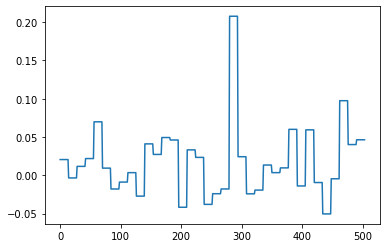

In [21]:
plt.plot(p22['slope_adaptive'])

C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

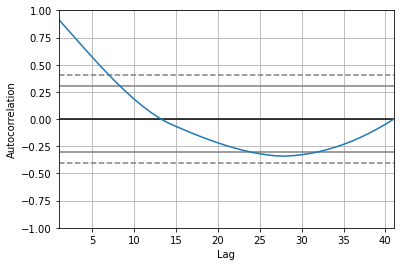

In [22]:
autocorr = tsa.acf(p22['slope_adaptive'])

pd.plotting.autocorrelation_plot(autocorr)

(array([  43.,    0.,   45.,  337., 2972., 9759., 5095., 1399.,  408.,
          75.]),
 array([-0.31436319, -0.25564424, -0.19692529, -0.13820634, -0.0794874 ,
        -0.02076845,  0.0379505 ,  0.09666945,  0.15538839,  0.21410734,
         0.27282629]),
 <BarContainer object of 10 artists>)

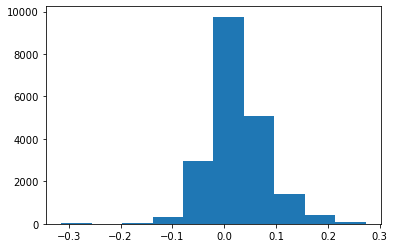

In [30]:
plt.hist(data['slope_adaptive'])

Mean seq1:  0.012263479740139093
Variance seq1:  0.030061704135844185
Mean seq2:  0.022153744725479436
Variance seq2:  0.05782893719519324


Text(0.5, 1.0, 'Autocorrelation Sequence 2')

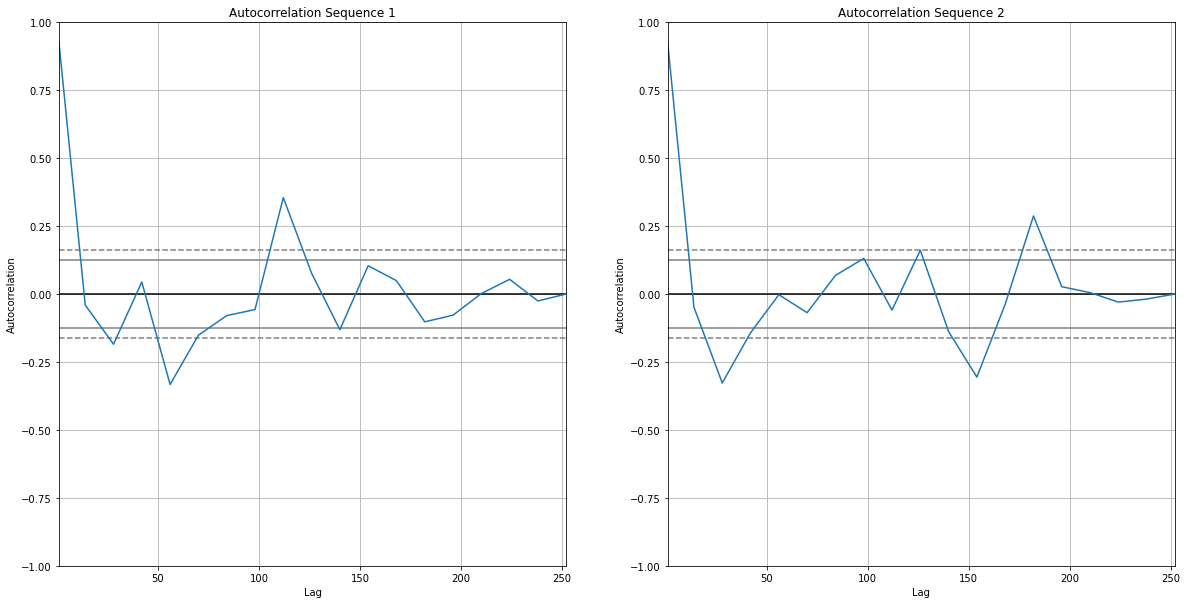

In [39]:
length = len(p22['slope_adaptive'])
seq1 = p22['slope_adaptive'][:length//2]
seq2 = p22['slope_adaptive'][length//2:]


print('Mean seq1: ' , np.mean(seq1))     #Mean is constant
print('Variance seq1: ', np.std(seq1))   #

print('Mean seq2: ' , np.mean(seq2))
print('Variance seq2: ', np.std(seq2))


plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

pd.plotting.autocorrelation_plot(seq1)
plt.title('Autocorrelation Sequence 1')

plt.subplot(1,2,2)

pd.plotting.autocorrelation_plot(seq2)
plt.title('Autocorrelation Sequence 2')

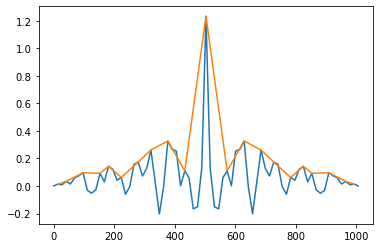

In [41]:
from scipy.signal import find_peaks
corr = np.correlate(p22['slope_adaptive'], p22['slope_adaptive'], mode='full')

# plot autocorrelation
plt.plot(corr)

# find peaks in autocorrelation
peaks, _ = find_peaks(corr)

# plot peaks
plt.plot(peaks, corr[peaks])

# show plot
#plt.show()